<a href="https://colab.research.google.com/github/MaulidinZakaria/16_MaulidinZakaria/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum Filter**

1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa
menggunakan library atau metode konvolusi dari OpenCV.
2. Berikut merupakan langkah-langkah yang dapat dilakukan:

  a. Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan
pada akun github seperti pada modul sebelumnya.

  b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan  

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

c. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi.
Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan
padding.

# Konvolusi tanpa Library

**Membuat fungsi konvolusi**

fungsi konvolusi yang dibuat memiliki parameter berupa :

1. citra masukan
2. kernel berupa matriks untuk memfilter citra
3. nilai stride / besarnya pergeseran untuk setiap konvolusi
4. nilai pad yang akan ditambahkan pada citra

In [3]:
def convolution2d(image, kernel, stride, pad):
    # Tentukan ukuran kernel
    kernel_height, kernel_width = kernel.shape

    # Tambahkan padding ke citra
    if pad > 0:
        image_padded = np.pad(image, ((pad, pad), (pad, pad)), mode='constant')
    else:
        image_padded = image

    # Tentukan ukuran output berdasarkan stride dan padding
    output_height = (image_padded.shape[0] - kernel_height) // stride + 1
    output_width = (image_padded.shape[1] - kernel_width) // stride + 1

    # Siapkan array untuk hasil konvolusi
    output = np.zeros((output_height, output_width))

    # Lakukan proses konvolusi
    for y in range(0, output_height):
        for x in range(0, output_width):
            # Ambil bagian dari citra yang sesuai dengan kernel
            region = image_padded[y * stride: y * stride + kernel_height,
                                  x * stride: x * stride + kernel_width]
            # Lakukan operasi dot product antara kernel dan region citra
            output[y, x] = np.sum(region * kernel)

    # **Clipping dan Normalisasi** hasil agar tetap dalam rentang [0, 255]
    # Clipping nilai piksel agar berada di rentang 0 - 255
    output = np.clip(output, 0, 255)

    # Konversi output ke tipe data uint8
    output = output.astype(np.uint8)

    return output


d. Load citra yang akan diproses dan ubah menjadi citra keabuan

In [4]:
img = cv.imread('/content/drive/MyDrive/Images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

e. Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening
sebagai berikut:

**Menentukan kernel yang akan digunakan**

In [5]:
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

f. Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil
konvolusinya:

**Memanggil fungsi konvolusi dan menerapkan setiap filter yang telah ditentukan**

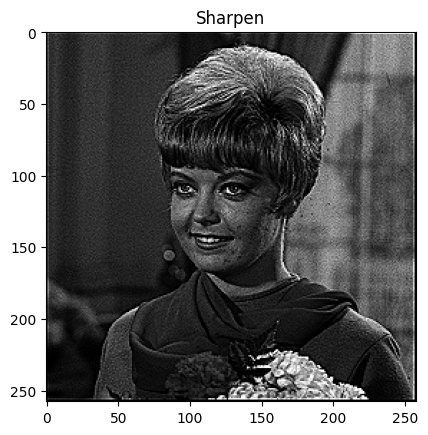

In [6]:
sharpen = convolution2d(img_gray,kernel_sharpen,1,2)

plt.title('Sharpen')
plt.imshow(sharpen, cmap='gray')
plt.show()

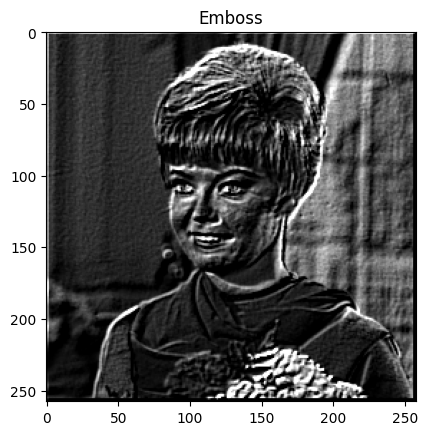

In [7]:
kernel_emboss = np.array([[-2,-1,0],
                           [-1,1,1],
                           [0,1,2]])

emboss = convolution2d(img_gray,kernel_emboss,1,2)

plt.title('Emboss')
plt.imshow(emboss, cmap='gray')
plt.show()

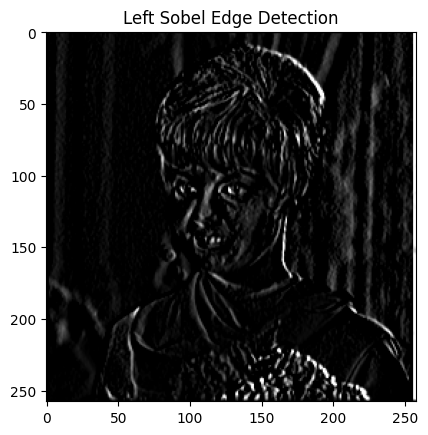

In [8]:
kernel_lsed = np.array([[1,-0,-1],
                           [2,0,-2],
                           [1,0,-1]])

lsed = convolution2d(img_gray,kernel_lsed,1,2)

plt.title('Left Sobel Edge Detection')
plt.imshow(lsed, cmap='gray')
plt.show()

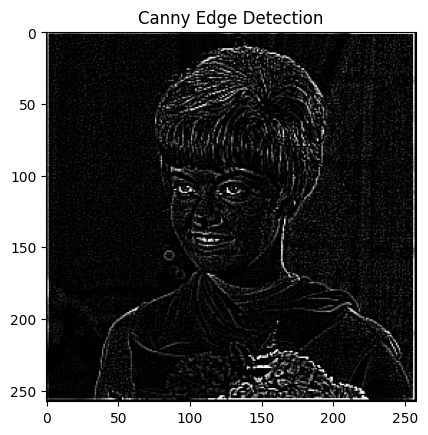

In [9]:
kernel_ced = np.array([[-1,-1,-1],
                           [-1,8,-1],
                           [-1,-1,-1]])

ced = convolution2d(img_gray,kernel_ced,1,2)

plt.title('Canny Edge Detection')
plt.imshow(ced, cmap='gray')
plt.show()

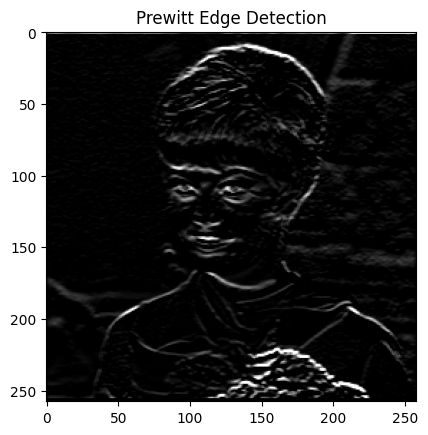

In [10]:
kernel_ped = np.array([[-1, -1, -1],
                      [0, 0, 0],
                      [1, 1, 1]])

ped = convolution2d(img_gray,kernel_ped,1,2)

plt.title('Prewitt Edge Detection')
plt.imshow(ped, cmap='gray')
plt.show()

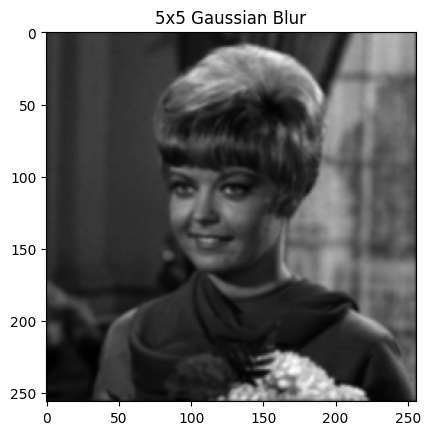

In [11]:
# Fungsi untuk membuat kernel Gaussian
def gaussian_kernel(size, sigma):
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma ** 2)) *
                      np.exp(-((x - (size - 1) / 2) ** 2 + (y - (size - 1) / 2) ** 2) / (2 * sigma ** 2)),
        (size, size)
    )
    return kernel / np.sum(kernel)  # Normalisasi kernel

# Buat kernel Gaussian 5x5
kernel_gaussian5 = gaussian_kernel(size=5, sigma=1)

gaussian5 = convolution2d(img_gray,kernel_gaussian5,1,2)

plt.title('5x5 Gaussian Blur')
plt.imshow(gaussian5, cmap='gray')
plt.show()

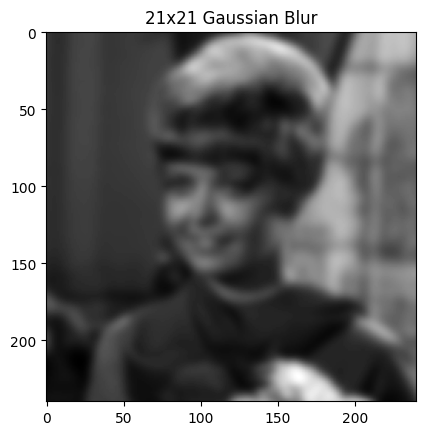

In [12]:
# Buat kernel Gaussian 21x21
kernel_gaussian21 = gaussian_kernel(size=21, sigma=3)

gaussian21 = convolution2d(img_gray,kernel_gaussian21,1,2)

plt.title('21x21 Gaussian Blur')
plt.imshow(gaussian21, cmap='gray')
plt.show()

#**E. Tugas Anggota Kelompok**

Diketahui KTM dengan kondisi citra yang berbeda. Lakukan perbaikan melalui implementasi
teknik filterisasi dan detection setiap citra. Terapkan juga histogram equalization dan operasi
aritmatika sebagai Teknik pendukung perbaikan citra KTM.

# **Load Image + Masking**

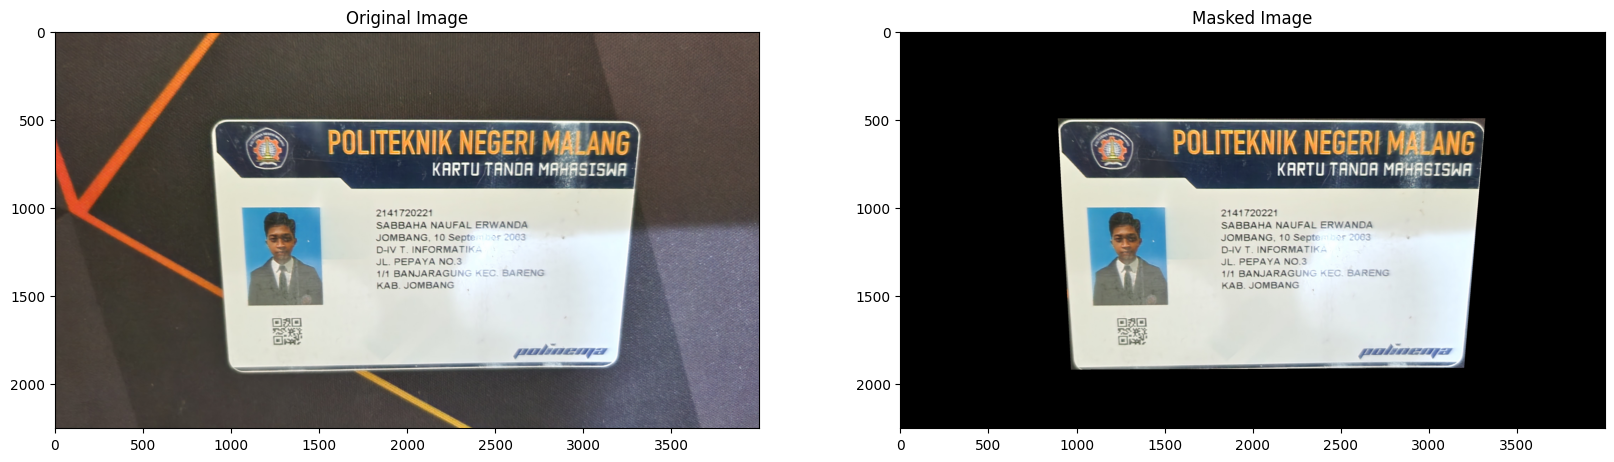

In [13]:
# Load image (KTM image)
img_path = '/content/drive/MyDrive/Images/KTM/3A_2141720221_4 - Sabbaha Naufal.jpg'  # Sesuaikan dengan path gambar
img = cv.imread(img_path)

# Konversi ke RGB
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Buat mask dengan ukuran yang sama dengan gambar
mask = np.zeros(img.shape, dtype=np.uint8)

points = np.array([[895,495],[3320,495],[3200,1910],[970,1920]], dtype=np.int32)
pts = points.reshape((-1, 1, 2))
cv.fillPoly(mask, [pts], color=(255,255,255))

# Terapkan mask pada gambar
masked_img = cv.bitwise_and(img_rgb, mask)

plt.figure(figsize=(20, 10))

# Tampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
# plt.axis("off")  # Mematikan sumbu

# Tampilkan gambar dengan mask
plt.subplot(1, 2, 2)
plt.imshow(masked_img)
plt.title("Masked Image")
# plt.axis("off")  # Mematikan sumbu

# Tampilkan semua gambar dalam satu figure
plt.show()


# **Crop gambar dengan Transformasi Perspektif**

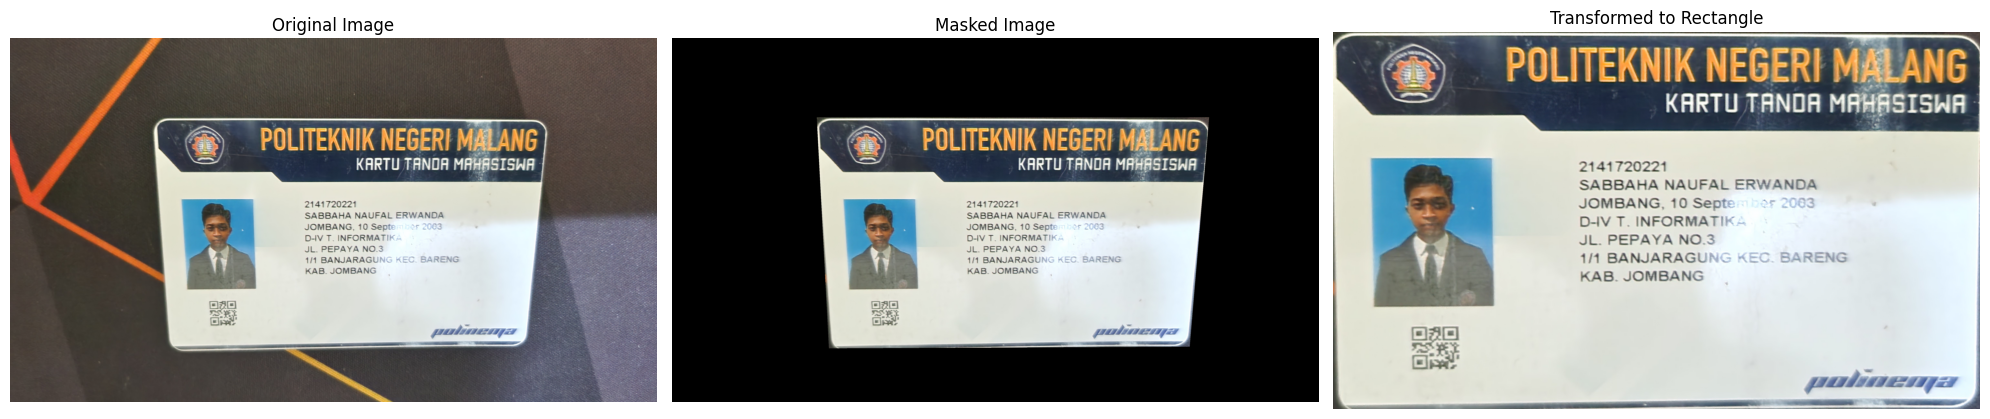

In [14]:
trapezium_points = np.array([[895, 495], [3320, 495], [3200, 1910], [970, 1920]], dtype=np.float32)

# Koordinat titik tujuan (persegi panjang dengan ukuran yang Anda inginkan)
rect_width = 2400  # Lebar yang diinginkan untuk persegi panjang hasil transformasi
rect_height = 1400  # Tinggi yang diinginkan
rect_points = np.array([[0, 0], [rect_width, 0], [rect_width, rect_height], [0, rect_height]], dtype=np.float32)

# Mendapatkan matriks transformasi perspektif
matrix = cv.getPerspectiveTransform(trapezium_points, rect_points)

# Menerapkan transformasi perspektif
warped_img = cv.warpPerspective(img_rgb, matrix, (rect_width, rect_height))

# Plotting
plt.figure(figsize=(20, 10))

# Tampilkan gambar asli
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

# Tampilkan gambar dengan mask
plt.subplot(1, 3, 2)
plt.imshow(masked_img)
plt.title("Masked Image")
plt.axis("off")

# Tampilkan gambar setelah transformasi perspektif
plt.subplot(1, 3, 3)
plt.imshow(warped_img)
plt.title("Transformed to Rectangle")
plt.axis("off")

plt.tight_layout()
plt.show()

# **Filterisasi dan Sharpening**

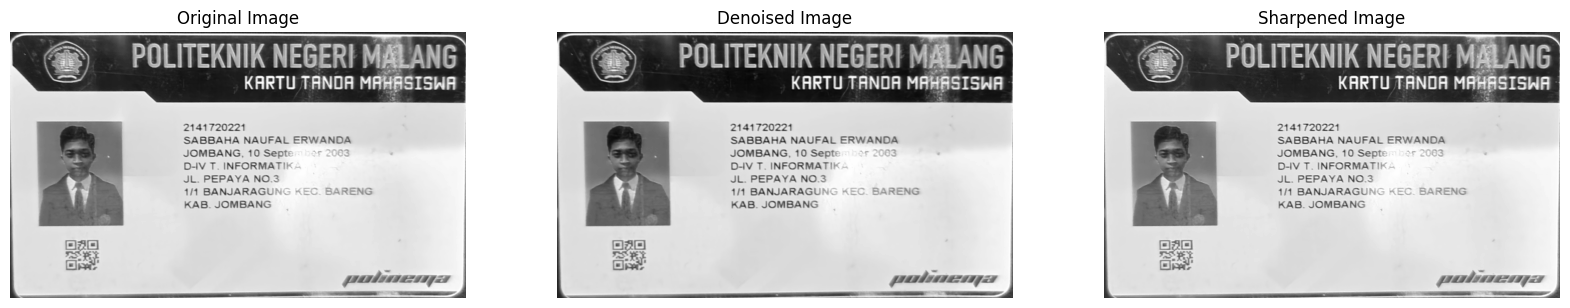

In [34]:
# 1. Penghapusan Noise dan Filterisasi menggunakan Gaussian Blur
gray_img = cv.cvtColor(warped_img, cv.COLOR_RGB2GRAY)
denoised_img = cv.GaussianBlur(gray_img, (5, 5), 0)

# 2. Tambahkan sharpening
# Kernel untuk sharpening
sharpening_kernel = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

# Terapkan sharpening menggunakan filter2D
sharpened_img = cv.filter2D(denoised_img, -1, sharpening_kernel)

plt.figure(figsize=(20, 10))

# Tampilkan gambar asli
plt.subplot(1, 3, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Image")
plt.axis("off")  # Mematikan sumbu

# Tampilkan gambar setelah denoising
plt.subplot(1, 3, 2)
plt.imshow(denoised_img, cmap='gray')
plt.title("Denoised Image")
plt.axis("off")  # Mematikan sumbu

# Tampilkan gambar setelah sharpening
plt.subplot(1, 3, 3)
plt.imshow(sharpened_img, cmap='gray')
plt.title("Sharpened Image")
plt.axis("off")  # Mematikan sumbu

# Tampilkan semua gambar dalam satu figure
plt.show()


# **Histogram Equalization**

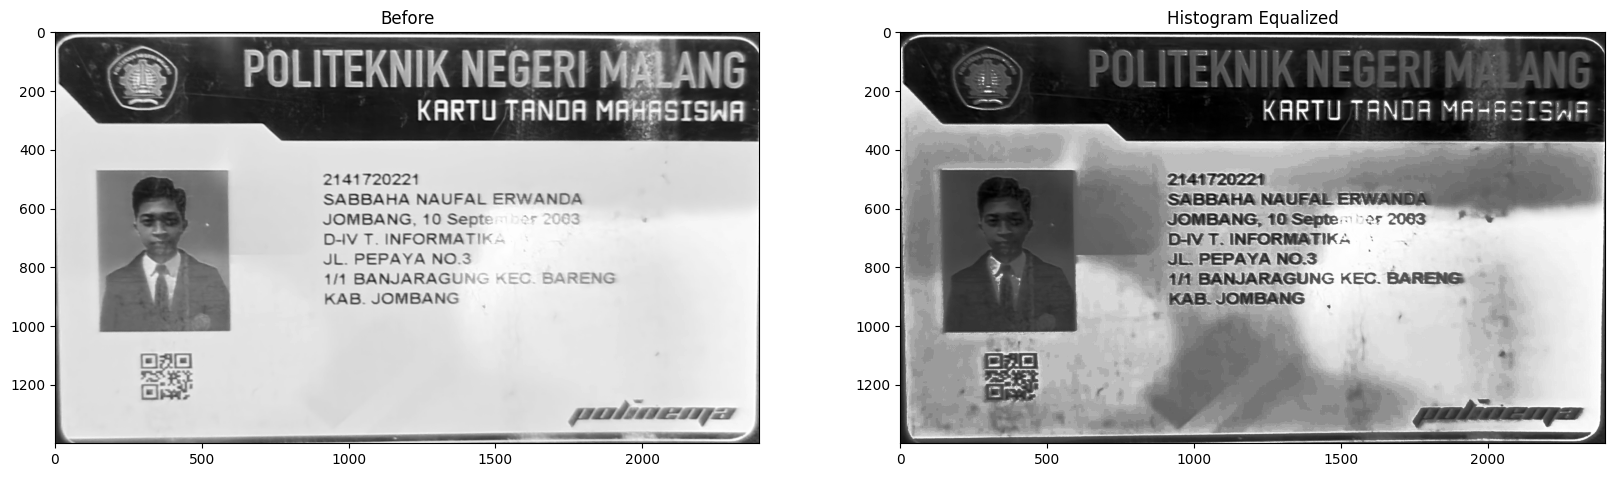

In [36]:
# 3. Histogram Equalization
# Konversi ke grayscale untuk histogram equalization
equalized_img = cv.equalizeHist(sharpened_img)

plt.figure(figsize=(20, 10))

# Tampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Before")
# plt.axis("off")  # Mematikan sumbu

# Tampilkan gambar setelah histogram equalization
plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title("Histogram Equalized")
# plt.axis("off")  # Mematikan sumbu

# Tampilkan semua gambar dalam satu figure
plt.show()

# **CLAHE**

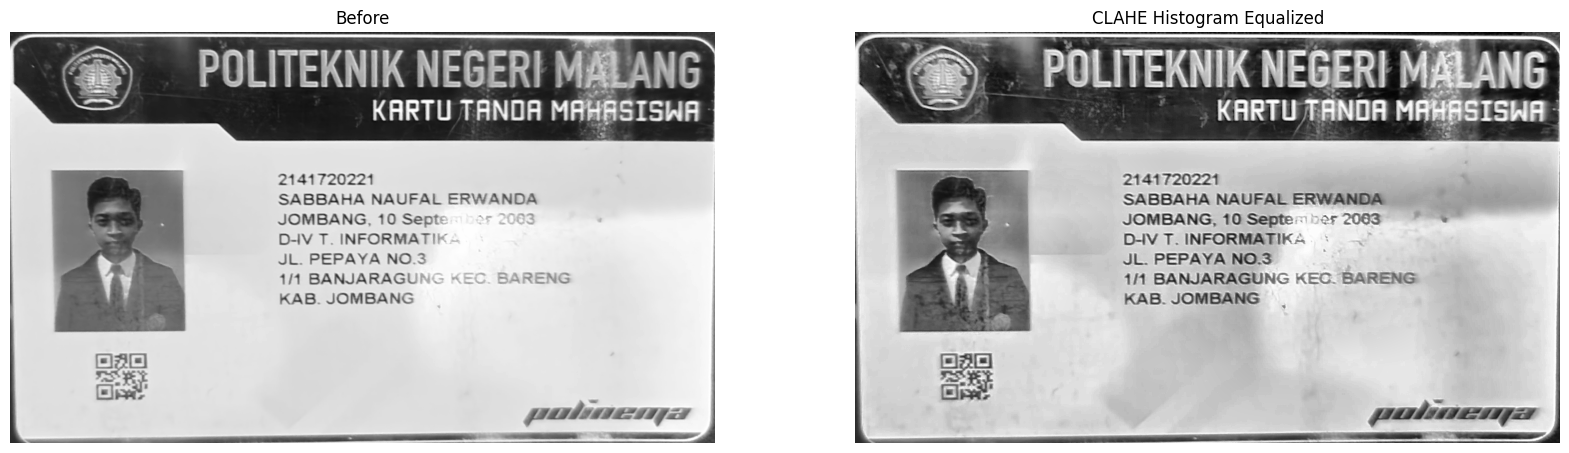

In [37]:
# 3. CLAHE Histogram Equalization (Contrast Limited Adaptive Histogram Equalization)
# Terapkan CLAHE
clahe = cv.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(sharpened_img)

plt.figure(figsize=(20, 10))

# Tampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Before")
plt.axis("off")  # Mematikan sumbu

# Tampilkan gambar setelah CLAHE histogram equalization
plt.subplot(1, 2, 2)
plt.imshow(clahe_img, cmap='gray')
plt.title("CLAHE Histogram Equalized")
plt.axis("off")  # Mematikan sumbu

# Tampilkan semua gambar dalam satu figure
plt.show()


# **Operasi Aritmatika**

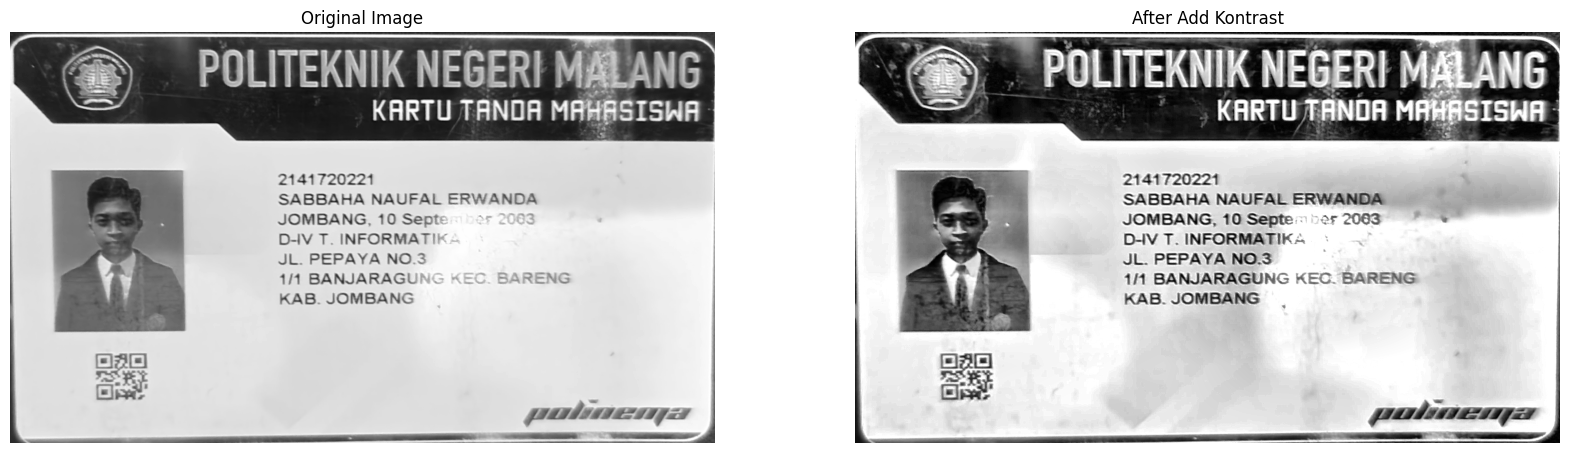

In [43]:
# Kurangi brightness untuk gambar overexposed
darkened_img = cv.convertScaleAbs(clahe_img, alpha=1.3, beta=-40)  # alpha untuk kontras, beta negatif untuk brightness

plt.figure(figsize=(20, 10))

# Tampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

# Tampilkan gambar yang diperbaiki untuk overexposed (kecerahan diturunkan)
plt.subplot(1, 2, 2)
plt.imshow(darkened_img, cmap='gray')
plt.title("After Add Kontrast")
plt.axis("off")

plt.show()


# **Output dengan CLAHE RGB**

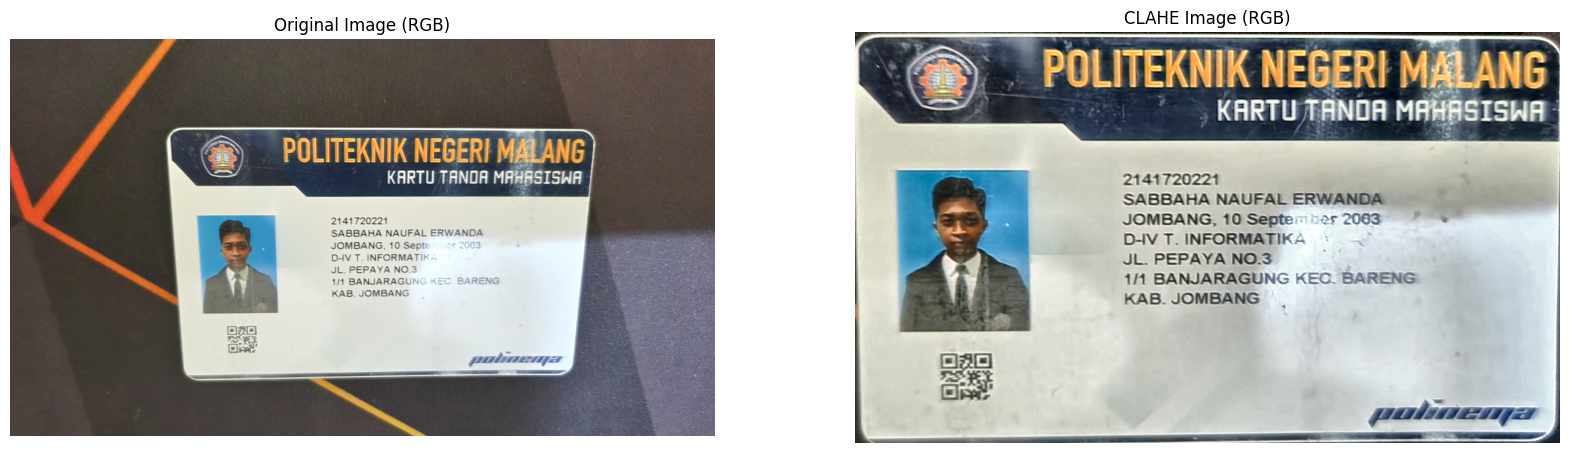

In [46]:
# 3. CLAHE Histogram Equalization (RGB)

denoised_img = cv.GaussianBlur(warped_img, (5, 5), 0)
sharpening_kernel = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])
sharpened_img = cv.filter2D(denoised_img, -1, sharpening_kernel)

# Konversi gambar ke ruang warna LAB
lab_img = cv.cvtColor(sharpened_img, cv.COLOR_RGB2LAB)

# Pisahkan channel L, A, dan B
l_channel, a_channel, b_channel = cv.split(lab_img)

# Terapkan CLAHE hanya pada L channel (luminance)
clahe = cv.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
l_channel_clahe = clahe.apply(l_channel)

# Gabungkan kembali channel L yang telah di-enhance dengan CLAHE dengan channel A dan B yang asli
lab_clahe_img = cv.merge((l_channel_clahe, a_channel, b_channel))

# Konversi kembali ke RGB dari LAB
rgb_clahe_img = cv.cvtColor(lab_clahe_img, cv.COLOR_LAB2RGB)

# Plot gambar asli dan hasil CLAHE (RGB)
plt.figure(figsize=(20, 10))

# Tampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image (RGB)")
plt.axis("off")

# Tampilkan gambar hasil CLAHE di ruang warna RGB
plt.subplot(1, 2, 2)
plt.imshow(rgb_clahe_img)
plt.title("CLAHE Image (RGB)")
plt.axis("off")

# Tampilkan semua gambar dalam satu figure
plt.show()